# COLLEGE DETECTION MODEL

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv('/kaggle/input/engineering-placements-prediction/collegePlace.csv')

In [3]:
df.sample(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
539,21,Male,Computer Science,2,7,0,0,1
467,21,Male,Civil,0,6,0,0,1
2894,22,Male,Mechanical,1,8,1,0,1
1540,21,Female,Information Technology,1,8,0,0,1
368,21,Female,Electrical,0,6,0,0,0
2156,21,Male,Information Technology,0,7,0,0,0
116,23,Male,Information Technology,1,7,1,0,1
1234,22,Male,Civil,0,7,0,0,0
2846,22,Male,Mechanical,0,7,1,0,0
1408,22,Male,Information Technology,1,6,0,0,0


In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Outcomes which I concluded from Pandas Profiling

* Missing cells	0

* Duplicate rows	516   # Damn 17%+ rows are duplicated


In [5]:
df.drop_duplicates()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2946,23,Male,Information Technology,1,7,1,1,0
2952,23,Male,Mechanical,0,8,1,0,1
2954,23,Female,Computer Science,1,8,0,1,1
2958,23,Male,Computer Science,0,6,0,1,0


# EDA

In [6]:
df.sample(2)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
562,22,Male,Electrical,1,7,0,1,0
662,21,Male,Electronics And Communication,1,8,1,1,1


<AxesSubplot:xlabel='Gender', ylabel='count'>

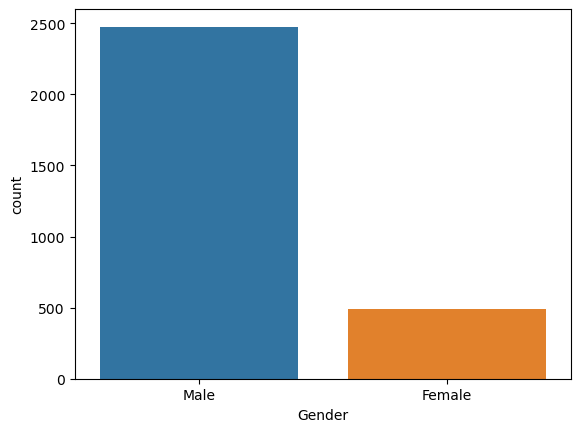

In [7]:
sns.countplot(x='Gender', data=df)

*Damn! This ratio needs to be improved*

<AxesSubplot:>

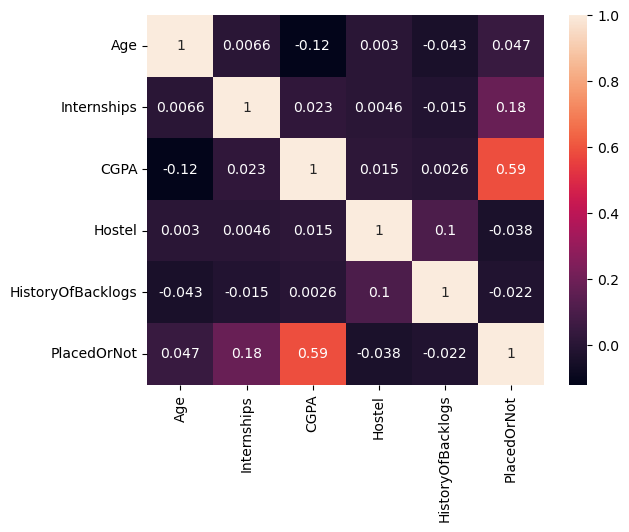

In [8]:
corr_matrix = df.corr()

# Plot a heat map of the correlation matrix
sns.heatmap(corr_matrix, annot=True)

> We can conclude that CGPA is one of the main contributing factor to Placements.I personally feel another factor would have been okay but CGPA.
> 
> Apart from CGPA, internship is other most important factor. Now I believe this should have the most important one instead of CGPA

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


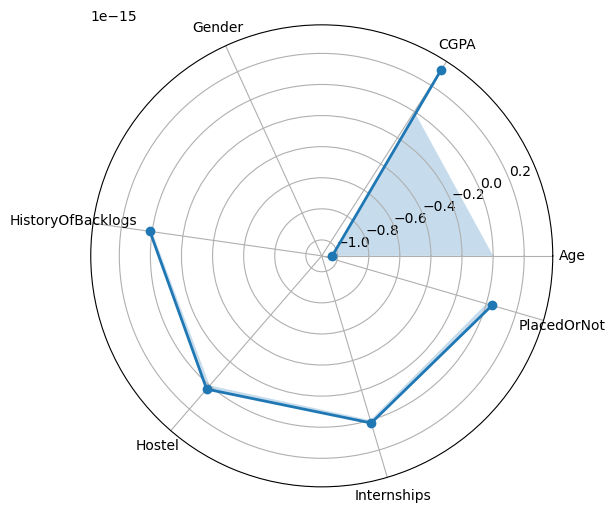

In [9]:
df_norm = (df - df.mean()) / df.std()

# Calculate the mean values of all features
means = df_norm.mean()

# Plot a radar chart of the mean values of all features
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(means.index, means.values, 'o-', linewidth=2)
ax.fill_between(means.index, means.values, alpha=0.25)
plt.show()

Text(0.5, 1.0, 'Stream')

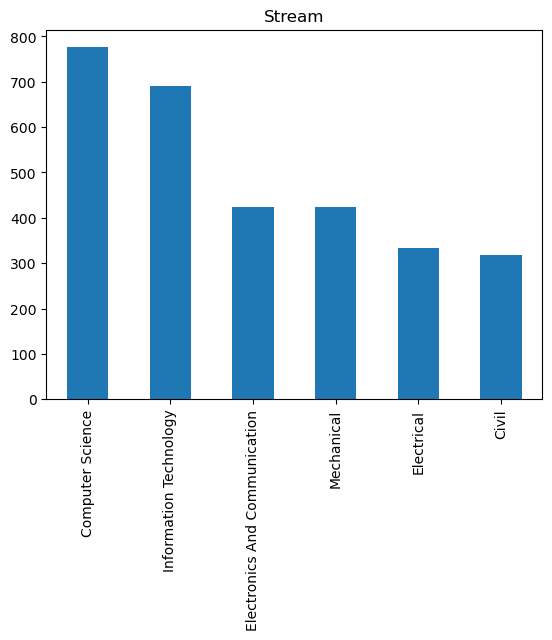

In [10]:
fig = df ['Stream'].value_counts().plot.bar()
fig.set_title('Stream')


<AxesSubplot:xlabel='Stream', ylabel='PlacedOrNot'>

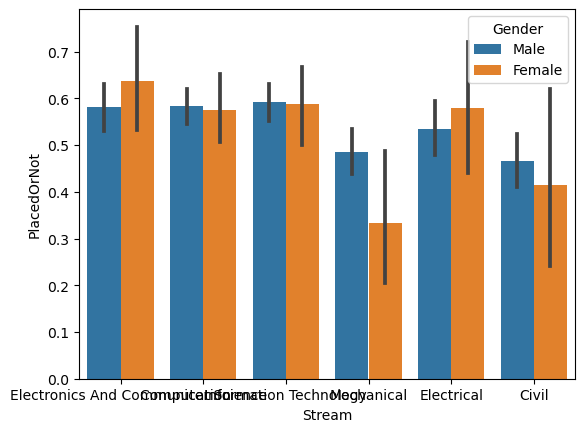

In [11]:
sns.barplot(data=df, x="Stream", y="PlacedOrNot",hue ="Gender")

> Wow, I never knew females got more placement offers in ENTC. Regarding electrical, I already had a hint about it.

One conclusion which I beleive we can form from this graph is that irrespective of the class size of males and females almost same number of students get placed. This shows many males either go for higher studies and some other stuff or leave studies mid-way.

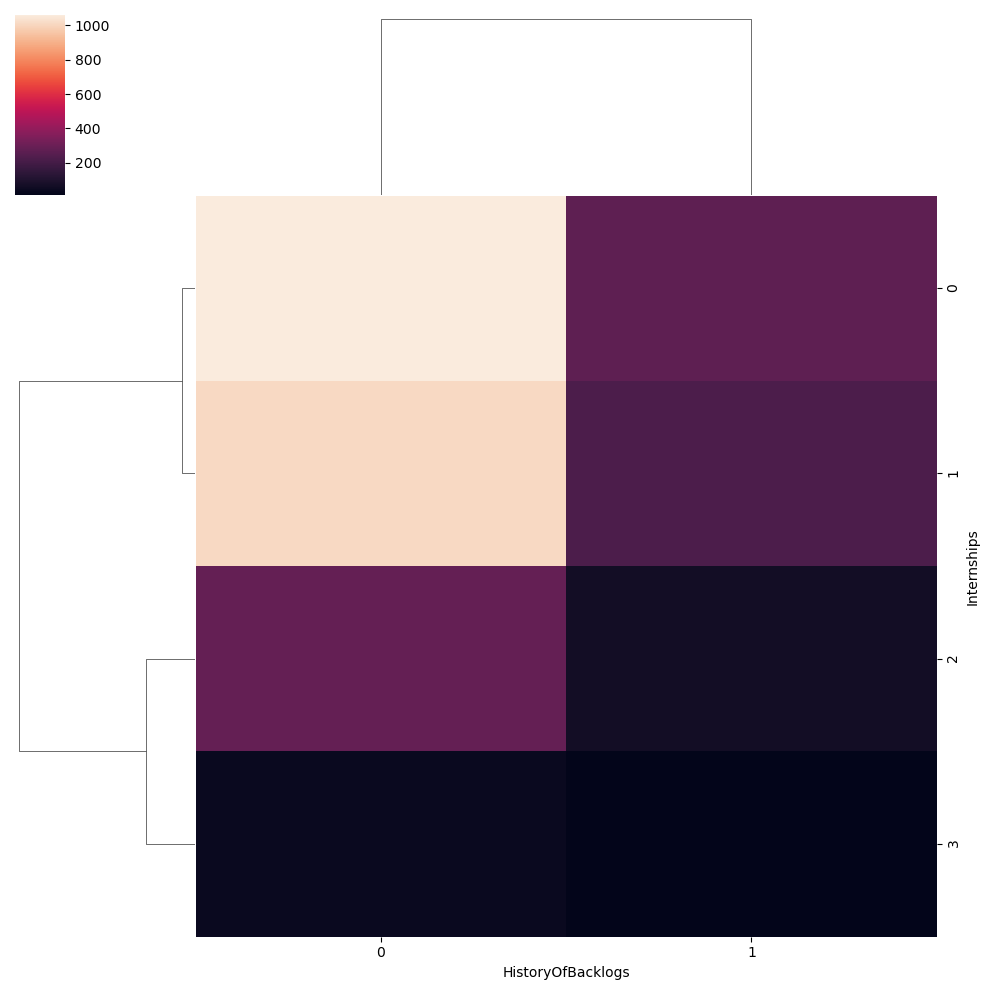

In [12]:
sns.clustermap(pd.crosstab(df['Internships'],df['HistoryOfBacklogs']))

# Feature Engineering

In [13]:
categorical_cols = ['Gender', 'Stream'] 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

array_hot_encoded = ohe.fit_transform(df[categorical_cols])

data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

data_other_cols = df.drop(columns=categorical_cols)

data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [14]:
y = df.PlacedOrNot
X = df.drop(['PlacedOrNot'],axis =1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
X_train

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2458,19,1,5,1,8,1,0
509,21,1,4,0,7,0,0
1370,21,1,4,0,7,0,1
1352,26,1,1,1,7,0,0
1779,23,1,2,1,8,0,0
...,...,...,...,...,...,...,...
1638,22,1,1,3,8,0,0
1095,22,1,1,1,6,0,0
1130,22,0,0,1,8,0,0
1294,22,1,1,0,7,0,0


# Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[194  86]
 [ 79 235]]
0.7222222222222222
Accuracy: 77.91 %
Standard Deviation: 1.26 %


# SVC

In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [20]:
y_pred2 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
print(accuracy_score(y_test, y_pred2))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[203  77]
 [ 81 233]]
0.734006734006734
Accuracy: 78.67 %
Standard Deviation: 1.36 %


# K-NN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred3 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
print(accuracy_score(y_test, y_pred3))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[247  33]
 [ 62 252]]
0.8400673400673401
Accuracy: 86.55 %
Standard Deviation: 1.44 %


# Random Forest Clasification

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [24]:
y_pred4 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
print(accuracy_score(y_test, y_pred4))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[260  20]
 [ 48 266]]
0.8855218855218855
Accuracy: 87.40 %
Standard Deviation: 1.03 %


# XG-Boost

In [25]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [26]:
y_pred5 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
print(accuracy_score(y_test, y_pred5))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[262  18]
 [ 51 263]]
0.8838383838383839
Accuracy: 88.45 %
Standard Deviation: 1.63 %


**The best fit model for dataset is XGBoost.**

**XGBoost gave Accuracy of 88.45%**

**Thanks for reading. Please upvote and comment you find this notebook informative.**